In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
from pylab import meshgrid
from matplotlib import cm

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 10.0)

In [8]:
# function to be maximized
def z_func(a, b):
    return 3*a + 2*b

In [27]:
# constraint on function
def constraint1(a, b):
    return a + b <= 80

In [28]:
# constraint on function
def constraint2(a, b):
    return 2*a + b <= 100

In [11]:
# x1 is between -100 and 100 in 1 steps
x1 = np.arange(-100, 100, 1) 
# x2 is same as x1
x2 = x1 
# make all possible combinations of x1 and x2
X1,X2 = meshgrid(x1, x2)
# calculate function value for all x1 and x2 combinations
Z = z_func(X1, X2)

## Do optimization with matrice masks

In [12]:
# find all possible combinations of x1 and x2 that satisfy constraint 1
constraint1_mask = constraint1(X1,X2)
# find all possible combinations of x1 and x2 that satisfy constraint 2
constraint2_mask = constraint2(X1,X2)
# find all possible combinations of x1 and x2 that satisfy both constraints 
constraint_mask = (constraint1_mask & constraint2_mask)

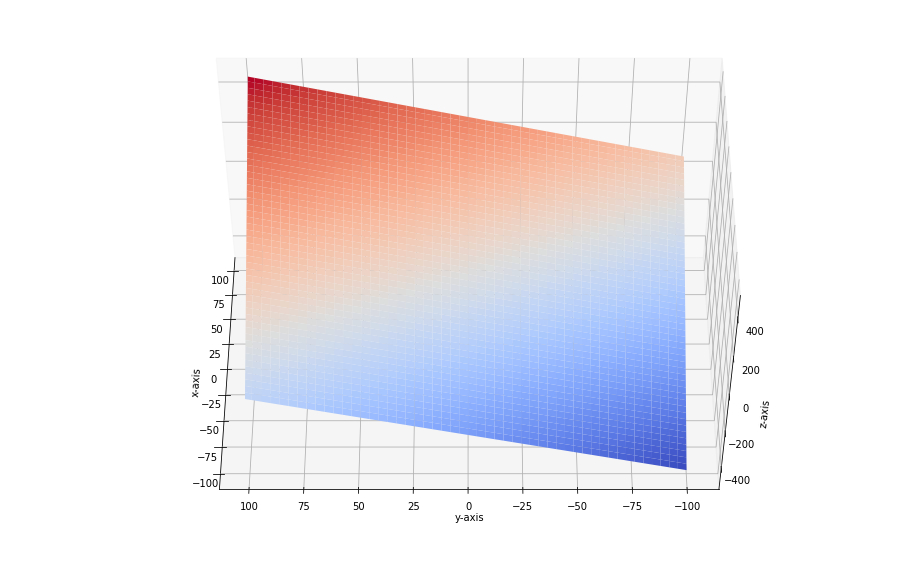

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm, linewidth=10, antialiased=True)

#ax.plot(X1[constraint_mask], X2[constraint_mask], z_func(X1[constraint_mask], X2[constraint_mask]), color='green')
#ax.plot(X1[constraint1_mask], X2[constraint1_mask], z_func(X1[constraint1_mask], X2[constraint1_mask]), color='yellow')
#ax.plot(X1[constraint2_mask], X2[constraint2_mask], z_func(X1[constraint2_mask], X2[constraint2_mask]), color='blue')

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.view_init(elev=50, azim=-180)

plt.show()

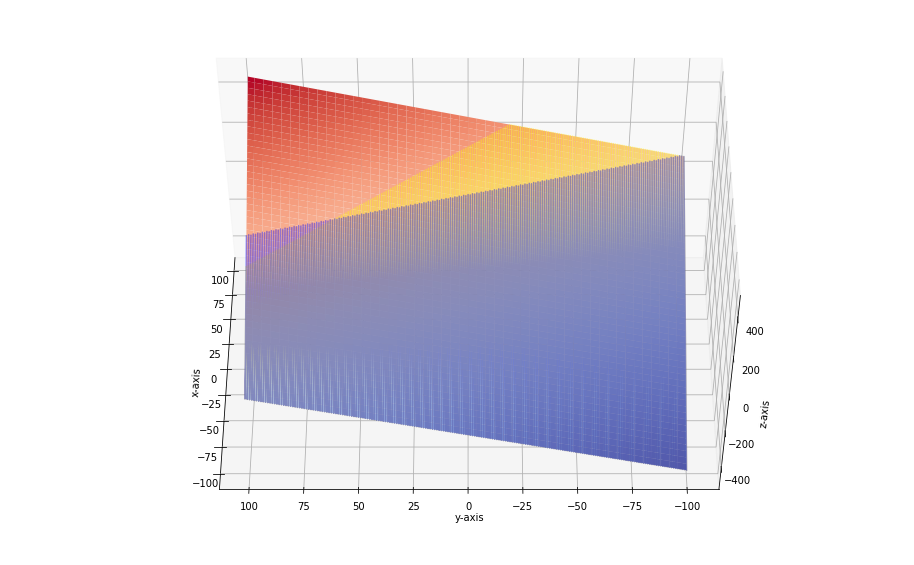

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm, linewidth=10, antialiased=True)

#ax.plot(X1[constraint_mask], X2[constraint_mask], z_func(X1[constraint_mask], X2[constraint_mask]), color='green')
ax.plot(X1[constraint1_mask], X2[constraint1_mask], z_func(X1[constraint1_mask], X2[constraint1_mask]), color='yellow', alpha=0.4)
ax.plot(X1[constraint2_mask], X2[constraint2_mask], z_func(X1[constraint2_mask], X2[constraint2_mask]), color='blue', alpha=0.4)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.view_init(elev=50, azim=-180)

plt.show()

In [21]:
Z_bounded = z_func(X1[constraint_mask], X2[constraint_mask])
X1_b = X1[constraint_mask]
X2_b = X2[constraint_mask]

## Function max value under constraints

In [22]:
Z_bounded.max()

180

### Optimal value for x1

In [23]:
X1_b[Z_bounded==180]

array([20])

### Optimal value for x2

In [24]:
X2_b[Z_bounded==180]

array([60])